In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [60]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,OrderMonth,Year-Month
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11,2017-11
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11,2017-11
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06,2017-06
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10,2016-10
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10,2016-10


In [4]:
df.shape

(9800, 18)

In [5]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [7]:
df = df.dropna()
df.shape

(9789, 18)

In [8]:
df.describe()

,Row ID,Postal Code,Sales
count,9789.000000,9789.000000,9789.000000
mean,4896.705588,55273.322403,230.116193
std,2827.486899,32041.223413,625.302079
min,1.000000,1040.000000,0.444000
25%,2449.000000,23223.000000,17.248000
50%,4896.000000,58103.000000,54.384000
75%,7344.000000,90008.000000,210.392000
max,9800.000000,99301.000000,22638.480000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9789 non-null   int64         
 1   Order ID       9789 non-null   object        
 2   Order Date     9789 non-null   datetime64[ns]
 3   Ship Date      9789 non-null   datetime64[ns]
 4   Ship Mode      9789 non-null   object        
 5   Customer ID    9789 non-null   object        
 6   Customer Name  9789 non-null   object        
 7   Segment        9789 non-null   object        
 8   Country        9789 non-null   object        
 9   City           9789 non-null   object        
 10  State          9789 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9789 non-null   object        
 13  Product ID     9789 non-null   object        
 14  Category       9789 non-null   object        
 15  Sub-Category   9789 non-nu

In [12]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d/%m/%Y")
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

# Total Sales

In [18]:
total_sales = df['Sales'].sum()
print(f'Total Sales: {total_sales}')

Total Sales: 2252607.4127


# Total Number of Orders

In [24]:
total_order = df['Order ID'].count()
print(f'Total Number of Orders: {total_order}')

Total Number of Orders: 9789


# Average Sales per order

In [27]:
average_sales = round(df['Sales'].mean(),2)
print(f'Average Sales per order: {average_sales}')

Average Sales per order: 230.12


# Maximum/Minimum Single Sale

In [28]:
maximum = df['Sales'].max()
minimum = df['Sales'].min()
print(f'Maximum Single Sale: {maximum}')
print(f'Minimum Single Sale: {minimum}')

Maximum Single Sale: 22638.48
Minimum Single Sale: 0.444


# On - Category

In [39]:
df['Category'].value_counts()

,count
Category,
Office Supplies,5903
Furniture,2076
Technology,1810


# Total Sales

In [44]:
total_sales_by_cat = df.groupby('Category')['Sales'].sum()
print(total_sales_by_cat)

Category
Furniture          723538.4757
Office Supplies    703212.8240
Technology         825856.1130
Name: Sales, dtype: float64


# Number of Orders



In [45]:
total_order_by_cat = df.groupby('Category')['Order ID'].count()
print(total_order_by_cat)

Category
Furniture          2076
Office Supplies    5903
Technology         1810
Name: Order ID, dtype: int64


9789

# Average Sale Value

In [47]:
avg_sale_value = df.groupby('Category')['Sales'].mean()
print(avg_sale_value)

Category
Furniture          348.525277
Office Supplies    119.128041
Technology         456.274096
Name: Sales, dtype: float64


# contribution of Category  on total sale

Text(0.5, 1.0, 'contribution of Category on total sale')

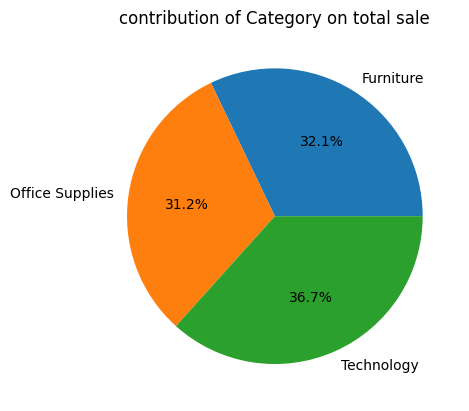

In [51]:
plt.pie(total_sales_by_cat, labels=avg_sale_value.index, autopct='%1.1f%%')
plt.title('contribution of Category on total sale')


# Time-based Sales Trends

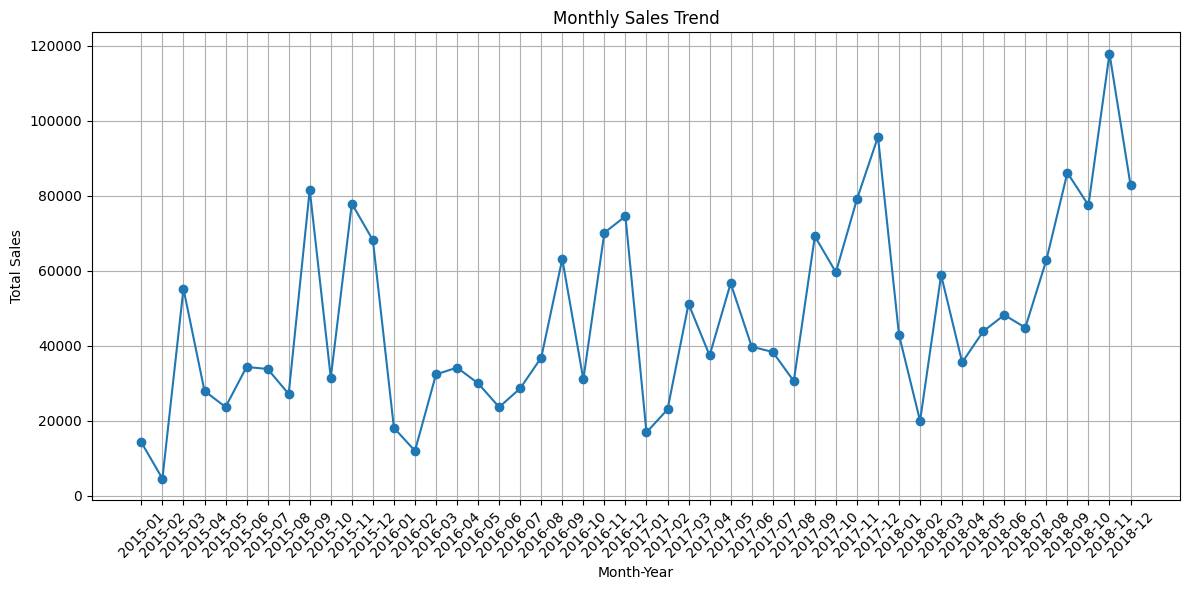

In [59]:
df['Year-Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Year-Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Year-wise sales comparison

Text(0, 0.5, 'Total Sales')

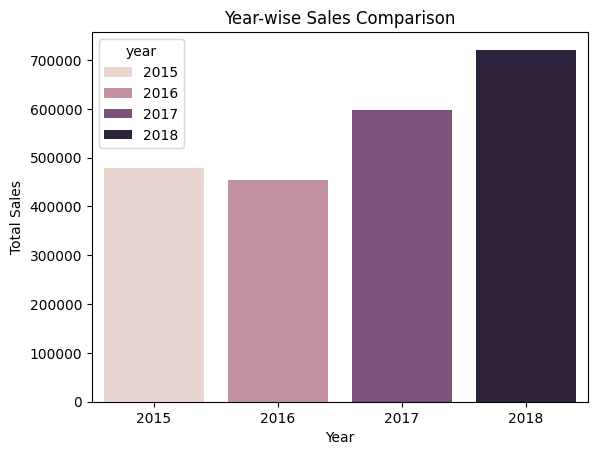

In [75]:
df['year'] = df['Year-Month'].dt.year
year_sales = df.groupby('year')['Sales'].sum().reset_index()
sns.barplot(x='year', y='Sales', data=year_sales,hue='year')
plt.title('Year-wise Sales Comparison')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Best performing month

<Axes: xlabel='month', ylabel='Sales'>

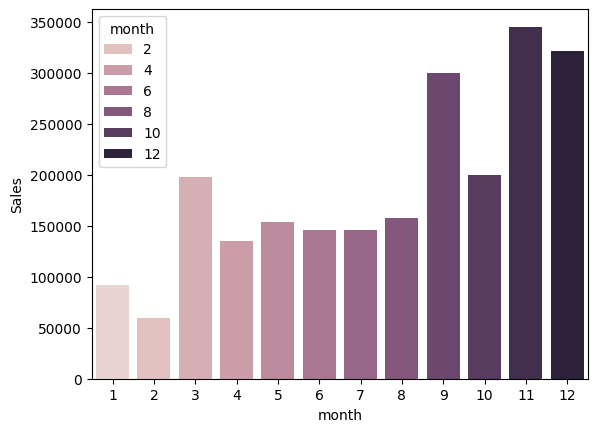

In [91]:
df['month'] = df['Year-Month'].dt.month
monthly_sales = df.groupby('month')['Sales'].sum().reset_index()
sns.barplot(x='month', y='Sales', data=monthly_sales,hue='month')

# Customer & Regional Analysis

# Region-wise sales distribution

In [95]:
df.groupby('Region')['Sales'].sum()

,Sales
Region,
Central,492646.9132
East,660589.3560
South,389151.4590
West,710219.6845


<Axes: xlabel='Region', ylabel='Sales'>

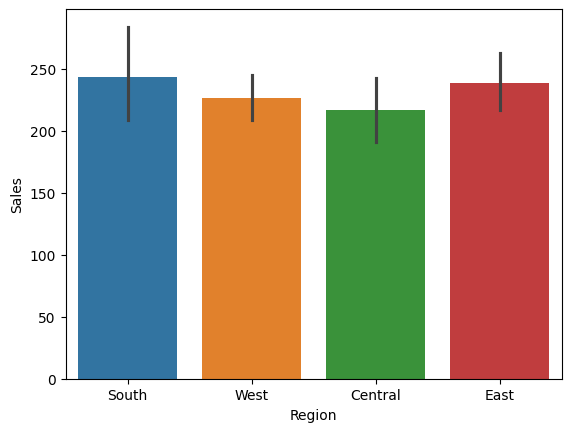

In [98]:
sns.barplot(x='Region', y='Sales', data=df,hue='Region')

# Top 10 cities by sales

In [105]:
df.sort_values(by='Sales', ascending=False).head(10).City

,City
2697,Jacksonville
6826,Lafayette
8153,Seattle
2623,New York City
4190,Newark
9039,Detroit
4098,Minneapolis
4277,Lakewood
8488,Arlington
6425,Philadelphia


# Customer Segment-wise sales

In [133]:
segment_data = [df.groupby('Segment')['Sales'].sum()]
pd.DataFrame(segment_data)

Segment,Consumer,Corporate,Home Office
Sales,1146708.151,682211.8348,423687.4269


# Shipping Analysis

In [135]:
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,5849
Second Class,1901
First Class,1501
Same Day,538


# Average shipping time

In [145]:
df['ship time'] = df['Ship Date'] - df['Order Date']
df['ship time'] = df['ship time'].dt.days


df.groupby('Ship Mode')['ship time'].mean()

,ship time
Ship Mode,
First Class,2.179214
Same Day,0.044610
Second Class,3.249868
Standard Class,5.009916


In [146]:
 # Cleaned data ko new CSV file mein save karo
df.to_csv('cleaned_superstore_data.csv', index=False)